<a href="https://colab.research.google.com/github/Ananya-AJ/Deep-Learning/blob/main/Assignment_3/Assignment_3_part_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers.legacy import SGD

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Generate non-linear data

n = 300
dim = 3
x = tf.random.uniform([n, dim], dtype=tf.float32)
print('Input shape =', x.shape)

Input shape = (300, 3)


In [ ]:
# Initialize weights and bias

weights = tf.transpose(tf.Variable([[2.0, -3.0, 1.0]], dtype=tf.float32))
bias = tf.Variable([8], dtype=tf.float32)
print('Weights shape =', weights.shape)
print('Bias shape =', bias.shape)

# non-linear 3 variable function to learn
y_true = tf.einsum('ij, jk -> ik', (x**3),  weights) + tf.einsum('ij, jk -> ik', (x**2),  weights) + tf.einsum('ij, jk -> ik', x, weights) + bias
print('Function output shape =', y_true.shape)

Weights shape = (3, 1)
Bias shape = (1,)
Function output shape = (300, 1)


In [ ]:
#initialize hyperparameters
input_dim = dim
output_dim = 1
hidden_dim = 16

learning_rate = 0.01
num_epochs = 50

#Using builtin layers

In [ ]:
#Linear layer class

class Linear(Layer):
  def __init__(self, units):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.wts = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', trainable=True)
      self.bias = self.add_weight(shape=(self.units,), initializer='random_normal', trainable=True)

  def call(self, inputs):
      return tf.einsum('ij, jk -> ik', inputs, self.wts) + self.bias

In [ ]:
#non-linear regression model
class Model(Layer):
  def __init__(self):
      super(Model, self).__init__()
      self.input_layer = Linear(input_dim)
      self.hidden_1 = Linear(hidden_dim)
      self.hidden_2 = Linear(hidden_dim)
      self.output_layer = Linear(output_dim)

  def call(self, input, training=None):
      x = self.input_layer(input)
      x = tf.nn.relu(x)
      x = self.hidden_1(x)
      x = tf.nn.relu(x)
      x = self.hidden_2(x)
      x = tf.nn.relu(x)
      x = self.output_layer(x)
      return x

In [ ]:
#train the model
model = Model()
y_pred = model(x, training=True)

#Non-linear regression using tensorflow low level API

In [ ]:
# Weights and biases for each of the layers
W1 = tf.Variable(tf.random.normal([input_dim, hidden_dim]))
b1 = tf.Variable(tf.zeros([hidden_dim]))
W2 = tf.Variable(tf.random.normal([hidden_dim, hidden_dim]))
b2 = tf.Variable(tf.zeros([hidden_dim]))
W3 = tf.Variable(tf.random.normal([hidden_dim, output_dim]))
b3 = tf.Variable(tf.zeros([output_dim]))

# Forward pass
def forward(X):
  h1 = tf.nn.relu(tf.matmul(tf.convert_to_tensor(x), W1) + b1)
  h2 = tf.nn.relu(tf.matmul(h1, W2) + b2)
  y_pred = tf.matmul(h2, W3) + b3
  return y_pred

# Loss function
def loss(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))

#optimizer
optimizer = tf.optimizers.SGD(learning_rate)

# define the training step
def train(x, y_true):
  with tf.GradientTape() as tape:
    y_pred = forward(x)
    loss_value = loss(y_true, y_pred)
  gradients = tape.gradient(loss_value, [W1, b1, W2, b2, W3, b3])
  optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))
  return loss_value

# train the model
loss_ = []
for epoch in range(num_epochs):
    loss_value = train(x, y_true)
    loss_.append(loss_value)
    print(f"Epoch {epoch}: Loss = {loss_value}")

Epoch 0: Loss = 217.4466094970703
Epoch 1: Loss = 388.3543701171875
Epoch 2: Loss = 98.59658813476562
Epoch 3: Loss = 68.09306335449219
Epoch 4: Loss = 62.44157409667969
Epoch 5: Loss = 58.188533782958984
Epoch 6: Loss = 54.02741622924805
Epoch 7: Loss = 49.41158676147461
Epoch 8: Loss = 44.10622787475586
Epoch 9: Loss = 37.54814910888672
Epoch 10: Loss = 29.52496337890625
Epoch 11: Loss = 21.52806854248047
Epoch 12: Loss = 16.207216262817383
Epoch 13: Loss = 13.8765230178833
Epoch 14: Loss = 12.644278526306152
Epoch 15: Loss = 11.621292114257812
Epoch 16: Loss = 10.723223686218262
Epoch 17: Loss = 9.916372299194336
Epoch 18: Loss = 9.183893203735352
Epoch 19: Loss = 8.515691757202148
Epoch 20: Loss = 7.904167652130127
Epoch 21: Loss = 7.329089164733887
Epoch 22: Loss = 6.7999067306518555
Epoch 23: Loss = 6.306192398071289
Epoch 24: Loss = 5.848852157592773
Epoch 25: Loss = 5.423476219177246
Epoch 26: Loss = 5.030429363250732
Epoch 27: Loss = 4.664668083190918
Epoch 28: Loss = 4.326105

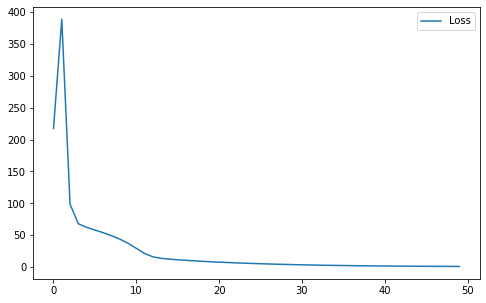

In [ ]:
#plot loss
plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), loss_, label='Loss')
plt.legend()

From the plot above, we see that the loss reduces and becomes stable as the number of epochs increases and reaches 30. This is because Backpropagation updates weights and biases so as to minimize the loss.

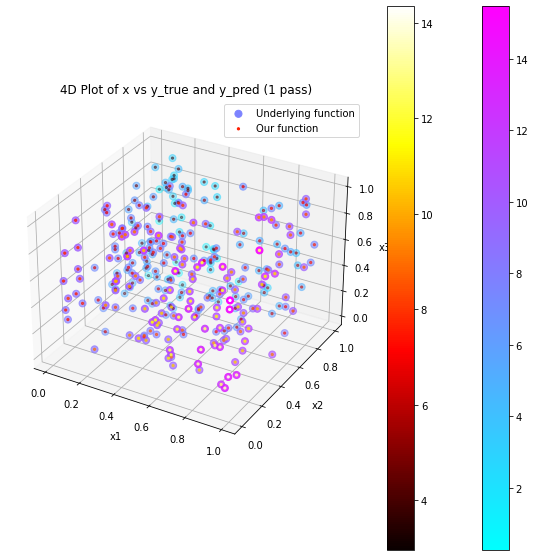

In [ ]:
#plot 4d for the function x vs actual and predictions
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(sc)
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=forward(x), cmap='hot', label='Our function', marker='.')
fig.colorbar(sc)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot of x vs y_true and y_pred (1 pass)')

plt.legend()
plt.show()

The network has learnt the underlying function well, from the above plot

In [ ]:
#Using tensorflow functional API
#using relu activation

x_ = tf.keras.layers.Input(shape=(input_dim,))
h1 = tf.keras.layers.Dense(hidden_dim, activation='relu')(x_)
h2 = tf.keras.layers.Dense(hidden_dim, activation='relu')(h1)
y = tf.keras.layers.Dense(output_dim, activation=None)(h2)

In [ ]:
#optimizer and loss function
optimizer = SGD(lr=learning_rate)
loss = tf.keras.losses.MeanSquaredError()

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model = tf.keras.Model(inputs=x_, outputs=y)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_3 (Dense)             (None, 16)                64        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#fitting the model
model.compile(optimizer=optimizer, loss=loss)
model.fit(x, y_true, epochs=num_epochs)
y_pred = model.predict(x)

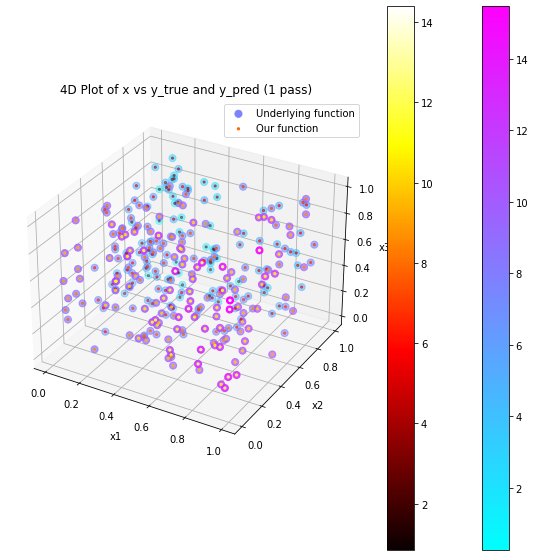

In [ ]:
#plot 4d for the function vs actual and true predictions
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(sc)
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred, cmap='hot', label='Our function', marker='.')
fig.colorbar(sc)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot of x vs y_true and y_pred (1 pass)')

plt.legend()
plt.show()

#Using tensoflow high level API - Keras

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_dim, input_dim=input_dim, activation=tf.nn.relu),
    tf.keras.layers.Dense(hidden_dim, activation=tf.nn.relu),
    tf.keras.layers.Dense(output_dim, activation=None)
])

In [ ]:
optimizer = SGD(lr=learning_rate)
loss = tf.keras.losses.MeanSquaredError()

In [ ]:
model.compile(optimizer=optimizer, loss=loss)
history = model.fit(x, y_true, epochs=num_epochs)

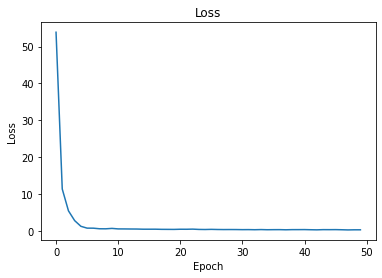

In [ ]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Loss reduces and remains stable after 10 epochs.